In [22]:
from typing import List
import numpy as np
import matplotlib.pyplot as plt



class BernoulliBandit:
    def __init__(self, K):
        self.K = K
        self.probs = np.random.uniform(size=K)
        self.best_idx = np.argmax(self.probs)
        self.best_prob = self.probs[self.best_idx]

    def step(self, k):
        if np.random.rand() < self.probs[k]:
            return 1
        return 0

In [23]:
np.random.seed(1)
K = 10
bandit = BernoulliBandit(10)
print(bandit.probs)
print(bandit.best_idx)
print(bandit.best_prob)


[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01 9.23385948e-02 1.86260211e-01 3.45560727e-01
 3.96767474e-01 5.38816734e-01]
1
0.7203244934421581


In [24]:
class Solver:
    def __init__(self, bandit: BernoulliBandit):
        self.bandit = bandit
        self.counts = np.zeros(self.bandit.K)
        self.regret = 0
        self.actions = []
        self.regrets = []

    def update_regret(self, k):
        self.regret += self.bandit.best_prob - self.bandit.probs[k]
        self.regrets.append(self.regret)

    def run_one_step(self):
        raise NotImplementedError

    def run(self, num_steps):
        for _ in range(num_steps):
            k = self.run_one_step()
            self.counts[k] += 1
            self.actions.append(k)
            self.update_regret(k)

In [25]:
class EpsilonGreedy(Solver):
    def __init__(self, name, bandit, epsilon=0.01, init_prob=1.0):
        super().__init__(bandit)
        self.name = name
        self.epsilon = epsilon
        self.estimates = np.array([init_prob] * self.bandit.K)
        
    def run_one_step(self):
        if np.random.random() < self.epsilon:
            k = np.random.randint(0, self.bandit.K)
        else:
            k = np.argmax(self.estimates)
        r = self.bandit.step(k)
        self.estimates[k] += 1.0 / (self.counts[k]+1) * (r - self.estimates[k])
        return k

In [45]:
class DecayingEpsilonGreedy(Solver):
    def __init__(self, name, bandit, epsilon=0.01, init_prob=1.0):
        super().__init__(bandit)
        self.name = name
        self.estimates = np.array([init_prob] * self.bandit.K)
        self.total_count = 0

    def run_one_step(self):
        self.total_count += 1
        if np.random.random() < 1 / self.total_count:
            k = np.random.randint(0, self.bandit.K)
        else:
            k = np.argmax(self.estimates)
        r = self.bandit.step(k)
        self.estimates[k] += 1.0 / (self.counts[k]+1) * (r - self.estimates[k])
        return k

In [26]:
def plot_results(solvers: List[Solver]):
    for solver in solvers:
        time_list = range(len(solver.regrets))
        plt.plot(time_list, solver.regrets, label=solver.name)
    plt.legend()
    plt.show()

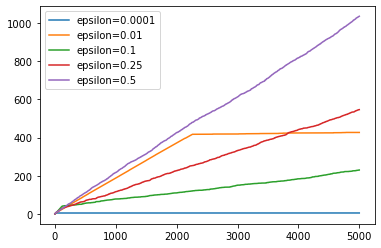

In [44]:
np.random.seed(1)
epsilons = [1e-4, 0.01, 0.1, 0.25, 0.5]
espilon_greedy_solvers = [EpsilonGreedy(f'epsilon={epsilon}', bandit, epsilon, init_prob=1.0) for epsilon in epsilons]
for solver in espilon_greedy_solvers:
    solver.run(5000)
plot_results(espilon_greedy_solvers)

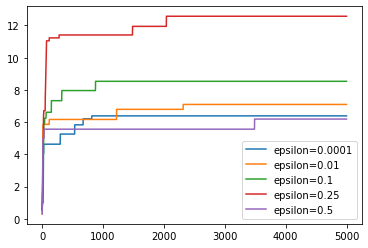

In [47]:
np.random.seed(0)
epsilons = [1e-4, 0.01, 0.1, 0.25, 0.5]
espilon_greedy_solvers = [DecayingEpsilonGreedy(f'epsilon={epsilon}', bandit, epsilon, init_prob=1.0) for epsilon in epsilons]
for solver in espilon_greedy_solvers:
    solver.run(5000)
plot_results(espilon_greedy_solvers)